In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


all_images_path = 'lfw2Data/lfw2'
training_ds_path =  'lfw2Data/pairsDevTrain.txt'
test_ds_path =  'lfw2Data/pairsDevTest.txt'
main_directory_content = [os.sep.join([all_images_path, x]) for x in list(filter(lambda x: not str(x).lower().find('ds_store')!=-1, os.listdir(all_images_path)))]

In [2]:
# get info on images distributions
def plot_distribution_num_of_images():
    def get_num_of_images_for_person() -> dict:
        names_to_num_of_images = {}
        for person_dir in main_directory_content:
            names_to_num_of_images[person_dir] = len(os.listdir(person_dir))
        return names_to_num_of_images
    fig, ax = plt.subplots()
    names_to_num_of_images_dict = get_num_of_images_for_person()
    num_of_images = np.array(list(names_to_num_of_images_dict.values()))
    # min max normalization
    # norm_num_of_images = (num_of_images - num_of_images.min())/(num_of_images.max() - num_of_images.min())
    ax.hist(num_of_images)
    # ax.set_xticks(range(0, 1000, 100))
    ax.set_title('total number of images {}\n total number of people {}'.format(sum(names_to_num_of_images_dict.values()), len(names_to_num_of_images_dict.keys())))
    return names_to_num_of_images_dict

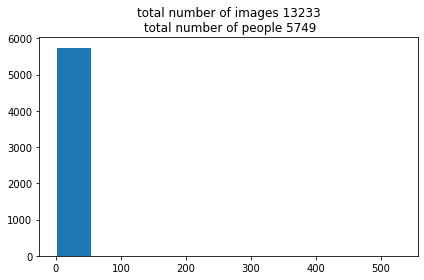

In [5]:
images_num_dict = plot_distribution_num_of_images()
plt.tight_layout()
plt.show()
min_num_of_im, max_num_of_im = min(images_num_dict.values()), max(images_num_dict.values())
max_n = 0
max_key = ''
for key, val in images_num_dict.items():
    if val > max_n:
        max_key = key
        max_n = val

In [7]:
# get info on database distribution
def plot_distribution_of_appearances(with_match: bool = False):
    def get_num_of_appearances(on_train: bool = True):
        num_of_appearances, matching_appearances, non_matching_appearances = {}
        path_to_inspect = training_ds_path if on_train else test_ds_path
        with open(path_to_inspect, 'r') as file_to_inspect:
            # skip first line
            line = file_to_inspect.readline()
            line = file_to_inspect.readline()
            while line != '' and line is not None:
                spl_line = line.split('\t')
                # matching pair
                if len(spl_line) == 3:
                    name = spl_line[0]
                    matching_appearances[name] = matching_appearances.get(name, 0) + 1
                elif len(spl_line) == 4:
                    name = spl_line[0]
                    non_matching_appearances[name] = non_matching_appearances.get(name, 0) + 1
                    num_of_appearances[name] = num_of_appearances.get(name, 0) + 1
                    name = spl_line[2]
                    non_matching_appearances[name] = non_matching_appearances.get(name, 0) + 1
                line = file_to_inspect.readline()
                num_of_appearances[name] = num_of_appearances.get(name, 0) + 1
        return num_of_appearances, matching_appearances, non_matching_appearances

    fig, ax = plt.subplots(2)
    train_dict, train_matching_appearances, train_non_matching_appearances = get_num_of_appearances()
    dict_vals = list(train_dict.values())
    ax[0].hist(dict_vals)
    ax[0].set_title('training_ds appearance distribtion')
    test_dict, test_matching_appearances, test_non_matching_appearances = get_num_of_appearances(on_train=False)
    dict_vals = list(test_dict.values())
    ax[1].hist(dict_vals)
    ax[1].set_title('test_ds appearance distribtion')
    if not with_match:
        return train_dict, test_dict
    return train_dict, test_dict, \
           train_matching_appearances,\
           train_non_matching_appearances,\
           test_matching_appearances,\
           test_non_matching_appearances

In [ ]:
train_appearance_dict, test_appearance_dict = plot_distribution_of_appearances()

train_max_n = 0
train_max_key = ''
for key, val in train_appearance_dict.items():
    if val > train_max_n:
        train_max_key = key
        train_max_n = val

test_max_n = 0
test_max_key = ''
for key, val in test_appearance_dict.items():
    if val > test_max_n:
        test_max_key = key
        test_max_n = val
plt.tight_layout()
plt.show()

ValueError: not enough values to unpack (expected 3, got 0)

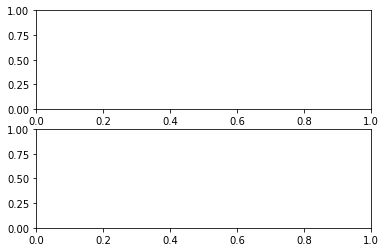

In [8]:
# matching vs Non matching ratio for each person
train_dict, test_dict, train_matching_appearances,train_non_matching_appearances,test_matching_appearances,test_non_matching_appearances = plot_distribution_of_appearances(with_match=True)
# todo:
# calc which appear in matching but not in non matching and vice versa